In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
file_path = "train_1.csv" ### you can get the the dataset form the kaggle 
df = pd.read_csv(file_path)

print(df.head())

print(df.isnull().sum())

df.fillna(method='ffill', inplace=True)

df = df.set_index('Page')
article = df.iloc[0]
article.index = pd.to_datetime(article.index)

print(article.head())


                                                Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-09  ...  2016-12-22  2016-12-23  2016-12-24  

<ipython-input-2-7c0ca5c5084e>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


2015-07-01    18.0
2015-07-02    11.0
2015-07-03     5.0
2015-07-04    13.0
2015-07-05    14.0
Name: 2NE1_zh.wikipedia.org_all-access_spider, dtype: float64


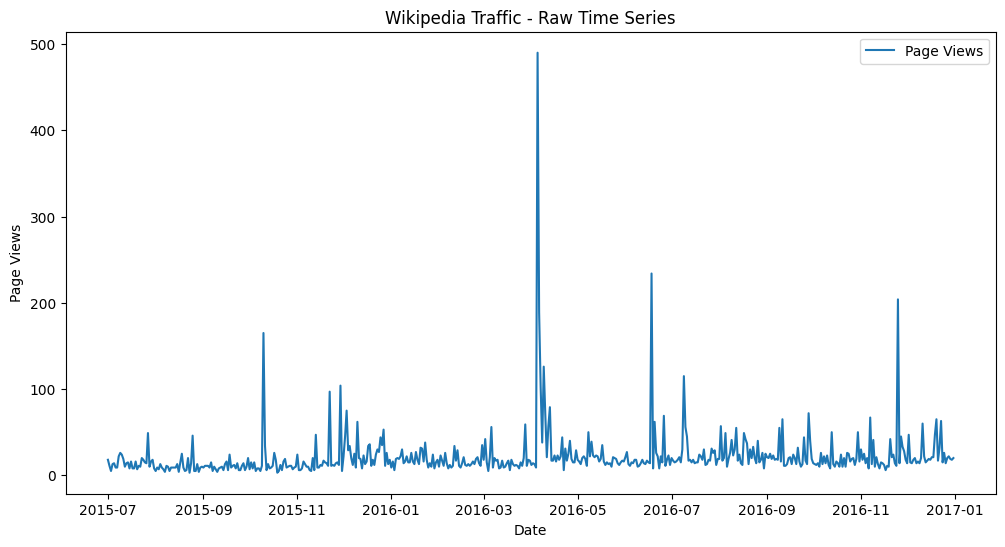

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(article, label="Page Views")
plt.title("Wikipedia Traffic - Raw Time Series")
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

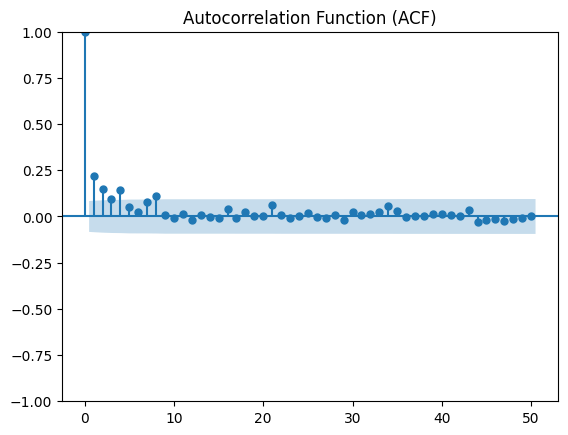

In [4]:
plt.figure(figsize=(12, 6))
plot_acf(article.dropna(), lags=50)
plt.title("Autocorrelation Function (ACF)")
plt.show()

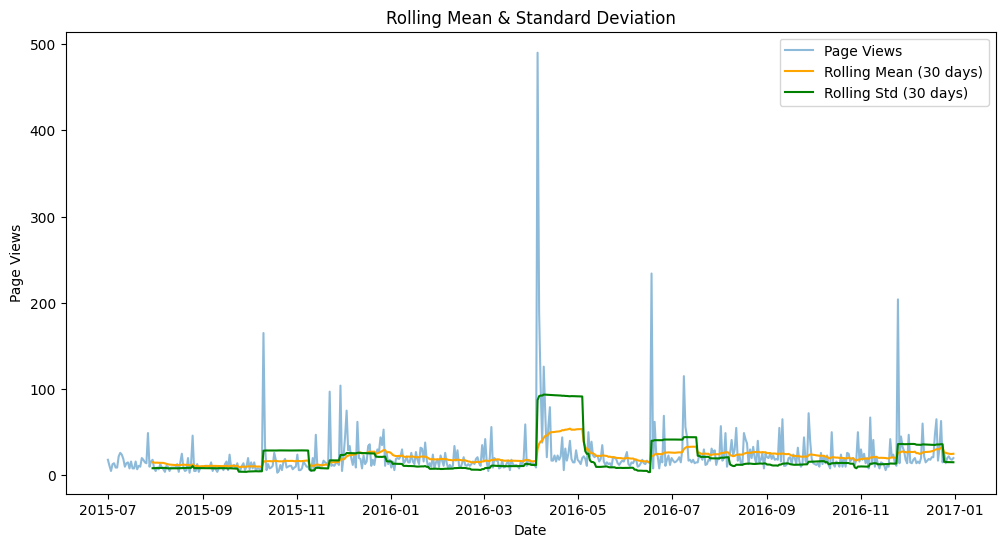

In [5]:
rolling_mean = article.rolling(window=30).mean()
rolling_std = article.rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(article, label="Page Views", alpha=0.5)
plt.plot(rolling_mean, label="Rolling Mean (30 days)", color='orange')
plt.plot(rolling_std, label="Rolling Std (30 days)", color='green')
plt.title("Rolling Mean & Standard Deviation")
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.legend()
plt.show()

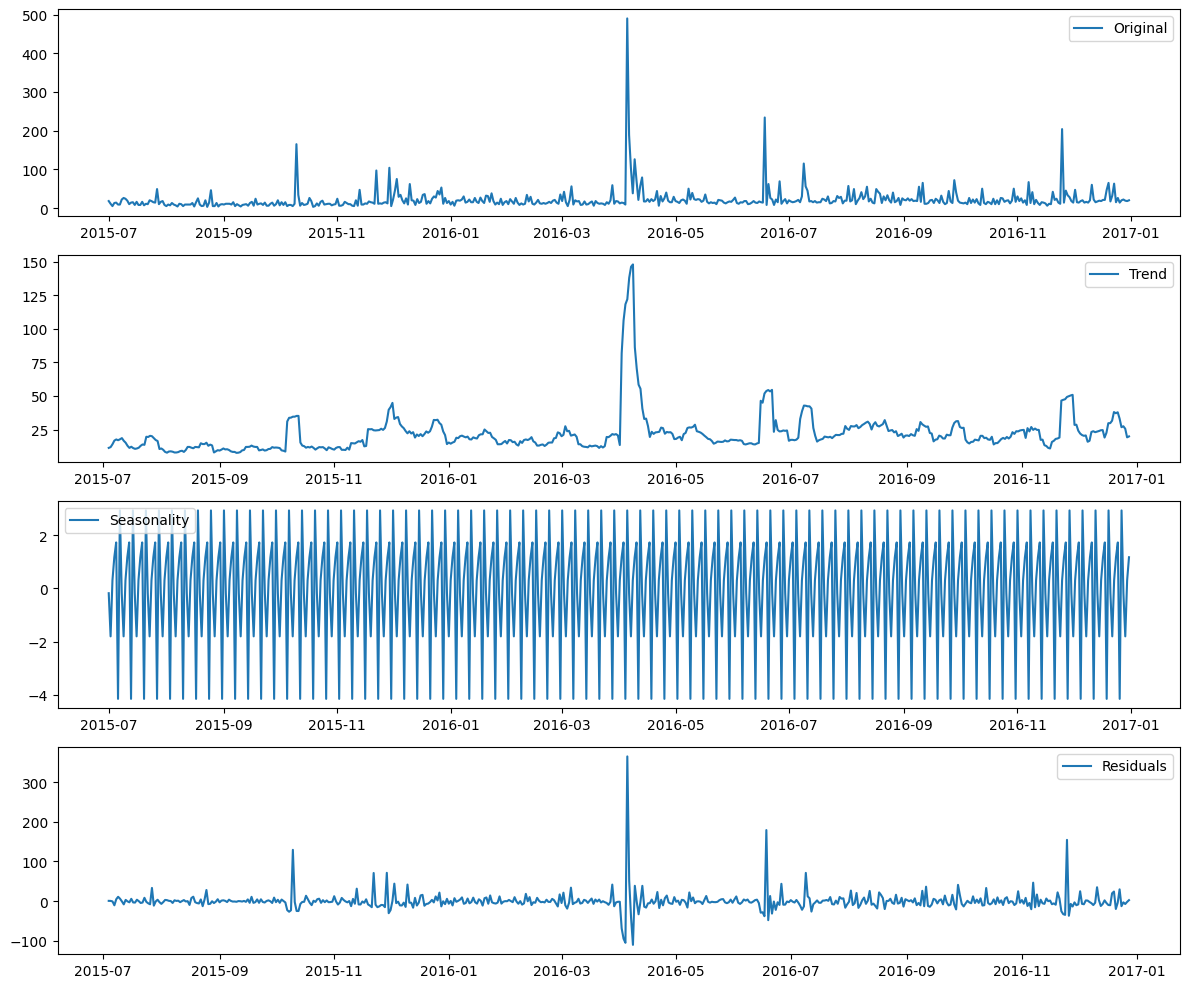

In [7]:
# Apply seasonal decomposition with a weekly period
decomposition = seasonal_decompose(article, model='additive', period=7)

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot seasonal decomposition
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(article, label="Original")
plt.legend(loc="best")
plt.subplot(412)
plt.plot(trend, label="Trend")
plt.legend(loc="best")
plt.subplot(413)
plt.plot(seasonal, label="Seasonality")
plt.legend(loc="best")
plt.subplot(414)
plt.plot(residual, label="Residuals")
plt.legend(loc="best")
plt.tight_layout()
plt.show()